# Hand coded Logistic Regression using Gradient Descent

Writing a logistic regression by hand is a popular programming interview question for experienced Data Scientists. In this notebook, I create a logistic regression function, and solve for the parameter estimates using gradient descent. 

<b>Sigmoid function:</b>

$$\sigma(t) = \frac{e^{t}}{e^{t}+1} = \frac{1}{1+e^{-t}}$$

<b>Logistic Regression:</b>

The logistic regression function predicts the probability that an observation is class 1, given the x features. It can be rearranged into the format of the sigmoid function. 
$$\pi_i = P(Y=1|X=x_i) = \frac{e^{\beta_0+\beta_1x_i}}{e^{\beta_0+\beta_1x_i}+1} =  \frac{1}{1+e^{-(\beta_0+\beta_1x_i)}} = \sigma(-(\beta_0+\beta_1x_i)) = \sigma(\beta^{T}X) $$

Where $$\beta = [\beta_0, \beta_1, \beta_2, ...,\beta_n]$$
$$Y \in [0,1]$$
$$X \in [X_1, X_2, ..., X_n]$$
$$x_i = [x_{i1}, x_{i2}, ..., x_{in}]$$


<b>Log-Likelihood Function:</b>

$$l(\beta|X, Y) = \sum_{n=1}^{n}[y_i\beta^T-\ln(1+e^{\beta^Tx_i})]$$

<b>Maximum Likelihood Estimate:</b>

The MLE for the parameter vector $\beta$ can be calculated from the log-likelihood function.
$$\widehat{\beta_{MLE}} = \text{argmax}_{\beta}\ l(\beta|X, Y) $$

To solve for the maximum likelihood estimate using argmax, we take the derivate of $l(\beta|X, Y)$ w.r.t. $\beta$, and set it equal to 0.

$$\nabla_\beta l = \sum_{n=1}^{n}[y_i-\sigma(\beta^Tx_i)]x_i = 0$$

This expression doe snot have a closed form solution, so we will use gradient descent to solve for the MLE parameter estimates $\widehat{\beta_{MLE}}$. For simplicity, I have not included the intercept in this calculation.

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns

In [134]:
#simulate some data
Y = np.sort(np.random.randint(low=0, high=2, size=100))
X1 = np.sort(np.random.normal(loc=0.0, scale=1, size=100))
X2 = np.sort(np.random.uniform(low=0, high=5, size=100))
X = np.vstack((X1, X2))

df = pd.DataFrame([y, X1, X2]).T
df.columns = ["labels", "X1", "X2"]
df["labels"] = df.labels.astype('int')
df.head(3)

,labels,X1,X2
0,0,-2.135166,0.131451
1,0,-1.658526,0.134047
2,0,-1.567905,0.273892


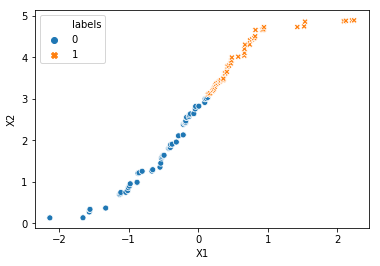

In [135]:
ax = sns.scatterplot(x="X1", y="X2",
                     hue="labels", style="labels", data=df)

In [136]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(B, X, Y):
    scores = np.dot(B.T, X)
    ll = np.sum(y*scores - log(1+np.exp(scores)))
    return ll

def gradient(X, Y, Yhat):
    gradient = np.dot(X, Y-Yhat)
    return gradient

In [137]:
def estimate_parameters(X, Y, num_steps=100, learning_rate=0.05):
    ''' Use gradient descent to estimate beta paramters'''
    
    #randomly initialize parameter vector
    B = np.zeros(X.shape[0])

    for i in range(num_steps):
        scores = np.dot(B.T, X)
        Yhat = sigmoid(scores)
        
        # calcualte gradient
        grad = gradient(X, Y, Yhat)
        
        # update parameters
        B += learning_rate * grad
        
    return B

In [142]:
#Use gradient descent to estimate logistic regression parameters
Bhat = estimate_parameters(X, Y, learning_rate=0.01)
Bhat

array([5.46762998, 0.1163999 ])

In [143]:
def logistic_regression(X, parameters, threshold=0.5):
    '''Use the logistic regression model to predict class based on features X'''
    
    scores = np.dot(parameters.T, X) 
    Yhat = sigmoid(scores)
    
    class_pred = classify(Yhat, threshold)
    
    return Yhat, class_pred

def classify(Yhat, threshold):
    return int(Yhat >= threshold)
    

In [153]:
#example predictions
print logistic_regression([-2, 3], Bhat)
print logistic_regression([5, 8], Bhat)

(2.526512652258599e-05, 0)
(0.9999999999994718, 1)
